In [1]:
!pip install transformers datasets

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt


tokenizer_gpt2 = AutoTokenizer.from_pretrained('gpt2')

In [3]:
# 分词效果示例，三段文本表示的意思是相近的
text_fr = '''Évariste Galois (/ɡælˈwɑː/; français : [evaʁist ɡalwa] ; 25 octobre 1811 - 31 mai 1832) était un mathématicien français et un militant politique. Alors qu'il était encore adolescent, il parvint à déterminer une condition nécessaire et suffisante pour qu'un polynôme soit résoluble par des radicaux, résolvant ainsi un problème qui était resté ouvert pendant 350 ans. Son travail posa les fondements de la théorie de Galois et de la théorie des groupes, deux branches majeures de l'algèbre abstraite. Il était un fervent républicain et fut très impliqué dans les troubles politiques qui entourèrent la Révolution française de 1830. En raison de son activisme politique, il fut arrêté à plusieurs reprises, purgé une peine de plusieurs mois de prison. Pour des raisons restées obscures, peu de temps après sa libération de prison, il se battit en duel et décéda des blessures qu'il subit.'''
text_en = '''Évariste Galois (/ɡælˈwɑː/; French: [evaʁist ɡalwa]; 25 October 1811 – 31 May 1832) was a French mathematician and political activist. While still in his teens, he was able to determine a necessary and sufficient condition for a polynomial to be solvable by radicals, thereby solving a problem that had been open for 350 years. His work laid the foundations for Galois theory and group theory, two major branches of abstract algebra. He was a staunch republican and was heavily involved in the political turmoil that surrounded the French Revolution of 1830. As a result of his political activism, he was arrested repeatedly, serving one jail sentence of several months. For reasons that remain obscure, shortly after his release from prison he fought in a duel and died of the wounds he suffered.'''
text_zh = '''埃瓦里斯特·伽罗瓦（法语：Évariste Galois，1811年10月25日—1832年5月31日，法语发音： [evaʁist ɡalwa]）是一位法国数学家和政治活动家。尽管还在十几岁时，他就能够确定多项式能够通过根式求解的充分必要条件，从而解决了一个悬而未决的问题，该问题已经存在了350年。他的工作奠定了Galois理论和群论的基础，这两个是抽象代数的重要分支。他是一位坚定的共和派，深度参与了1830年法国大革命期间的政治动荡。由于他的政治活动，他多次被逮捕，其中一次入狱数月。由于原因不明，他在刑满释放后不久，参与了一场决斗并因受伤而去世。'''

texts = {
    'fr': text_fr,
    'en': text_en,
    'zh': text_zh
}

In [4]:
re = tokenizer_gpt2.encode(text_en)
re

[38351,
 7785,
 40833,
 5027,
 10924,
 50247,
 133,
 94,
 21241,
 75,
 45990,
 86,
 133,
 239,
 135,
 238,
 14,
 26,
 4141,
 25,
 685,
 48855,
 134,
 223,
 396,
 220,
 133,
 94,
 282,
 10247,
 11208,
 1679,
 3267,
 1248,
 1157,
 784,
 3261,
 1737,
 1248,
 2624,
 8,
 373,
 257,
 4141,
 48251,
 290,
 1964,
 11276,
 13,
 2893,
 991,
 287,
 465,
 15508,
 11,
 339,
 373,
 1498,
 284,
 5004,
 257,
 3306,
 290,
 6751,
 4006,
 329,
 257,
 745,
 6213,
 49070,
 284,
 307,
 1540,
 23765,
 416,
 32842,
 11,
 12839,
 18120,
 257,
 1917,
 326,
 550,
 587,
 1280,
 329,
 13803,
 812,
 13,
 2399,
 670,
 8104,
 262,
 19369,
 329,
 5027,
 10924,
 4583,
 290,
 1448,
 4583,
 11,
 734,
 1688,
 13737,
 286,
 12531,
 37139,
 13,
 679,
 373,
 257,
 34700,
 41477,
 290,
 373,
 7272,
 2950,
 287,
 262,
 1964,
 26962,
 326,
 11191,
 262,
 4141,
 9303,
 286,
 45440,
 13,
 1081,
 257,
 1255,
 286,
 465,
 1964,
 23034,
 11,
 339,
 373,
 5169,
 7830,
 11,
 7351,
 530,
 7356,
 6827,
 286,
 1811,
 1933,
 13,
 1114,
 38

In [7]:
'_'.join([tokenizer_gpt2.decode(i) for i in tokenizer_gpt2.encode(text_en)])

'É_var_iste_ Gal_ois_ (/_�_�_æ_l_ˈ_w_�_�_�_�_/_;_ French_:_ [_eva_�_�_ist_ _�_�_al_wa_];_ 25_ October_ 18_11_ –_ 31_ May_ 18_32_)_ was_ a_ French_ mathematician_ and_ political_ activist_._ While_ still_ in_ his_ teens_,_ he_ was_ able_ to_ determine_ a_ necessary_ and_ sufficient_ condition_ for_ a_ po_lyn_omial_ to_ be_ sol_vable_ by_ radicals_,_ thereby_ solving_ a_ problem_ that_ had_ been_ open_ for_ 350_ years_._ His_ work_ laid_ the_ foundations_ for_ Gal_ois_ theory_ and_ group_ theory_,_ two_ major_ branches_ of_ abstract_ algebra_._ He_ was_ a_ staunch_ republican_ and_ was_ heavily_ involved_ in_ the_ political_ turmoil_ that_ surrounded_ the_ French_ Revolution_ of_ 1830_._ As_ a_ result_ of_ his_ political_ activism_,_ he_ was_ arrested_ repeatedly_,_ serving_ one_ jail_ sentence_ of_ several_ months_._ For_ reasons_ that_ remain_ obscure_,_ shortly_ after_ his_ release_ from_ prison_ he_ fought_ in_ a_ duel_ and_ died_ of_ the_ wounds_ he_ suffered_.'

In [8]:
'_'.join([tokenizer_gpt2.decode(i) for i in tokenizer_gpt2.encode(text_fr)])

"É_var_iste_ Gal_ois_ (/_�_�_æ_l_ˈ_w_�_�_�_�_/_;_ fr_an_ç_ais_ :_ [_eva_�_�_ist_ _�_�_al_wa_]_ ;_ 25_ oct_ob_re_ 18_11_ -_ 31_ m_ai_ 18_32_)_ _ét_ait_ un_ math_é_matic_ien_ fr_an_ç_ais_ et_ un_ militant_ polit_ique_._ Al_ors_ qu_'_il_ _ét_ait_ enc_ore_ adolescent_,_ il_ par_v_int_ à_ dé_termin_er_ une_ condition_ n_é_cess_aire_ et_ suff_is_ante_ pour_ qu_'_un_ po_lyn_ô_me_ so_it_ r_és_ol_uble_ par_ des_ rad_ic_aux_,_ r_és_ol_vant_ a_ins_i_ un_ prob_l_è_me_ qui_ _ét_ait_ rest_é_ o_u_vert_ p_endant_ 350_ ans_._ Son_ tra_v_ail_ pos_a_ les_ fond_ements_ de_ la_ th_é_orie_ de_ Gal_ois_ et_ de_ la_ th_é_orie_ des_ group_es_,_ de_ux_ branches_ maj_e_ures_ de_ l_'_alg_è_bre_ ab_stra_ite_._ Il_ _ét_ait_ un_ ferv_ent_ ré_public_ain_ et_ fut_ tr_è_s_ impl_iqu_é_ d_ans_ les_ troubles_ polit_iques_ qui_ ent_our_è_rent_ la_ Ré_v_olution_ fr_an_ça_ise_ de_ 1830_._ En_ ra_ison_ de_ son_ activism_e_ polit_ique_,_ il_ fut_ arr_ê_t_é_ à_ plus_ie_urs_ re_prises_,_ pur_g_é_ une_ pe_ine_ de_ plus_ie_urs_ mo

In [9]:
'_'.join([tokenizer_gpt2.decode(i) for i in tokenizer_gpt2.encode(text_zh)])

'�_�_�_�_�_�_�_�_�_�_�_�_·_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_É_var_iste_ Gal_ois_�_�_�_18_11_�_�_10_�_�_25_�_�_—_18_32_�_�_5_�_�_31_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_ [_eva_�_�_ist_ _�_�_al_wa_]_�_�_�_是_一_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_。_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_��_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_的_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_一_�_�_�_��_�_�_�_�_�_�_的_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_350_�_�_。_�_�_的_�_�_作_�_�_�_�_�_�_G_alo_is_�_�_�_�_�_�_�_�_�_�_�_�_�_�_的_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_是_�_�_�_�_�_�_代_�_�_的_�_�_�_�_�_�_�_�_�_。_�_�_是_一_�_�_�_�_�_�_�_的_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_18_30_�_�_�_�_�_�_大_�_�_�_�_�_�_�_�_�_的_�_�_�_�_�_�_�_�_�_�_�_。_�_�_�_�_�_�_的_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_中_一_�_�_�_�_�_�_�_�_�_�_�_。_�_�_�_�_�_�_�_�_不_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_不_�_�_�_�_�_�_�_�_�_�_�_一_�_�_�_�_�_�_�_

In [12]:
def get_token_stats(tokenizer):
    str_stats = {}
    token_stats = {}
    for (k, v) in texts.items():
        str_stats[k] = len(v.split()) if k != 'zh' else len(v)
        token_stats[k] = len(tokenizer.encode(v))
    return str_stats, token_stats

In [13]:
get_token_stats(tokenizer_gpt2)

({'fr': 142, 'en': 132, 'zh': 278}, {'fr': 307, 'en': 176, 'zh': 497})

In [14]:
def draw_bar(str_stats, token_stats):
    # 将统计结果可视化
    fig = plt.figure(figsize=(6, 6), dpi=80)
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams.update({'font.size': 13})
    bar_width = 0.1
    base = range(len(str_stats))
    br_str = [x - bar_width for x in base]
    br_token = [x + bar_width for x in base]
    plt.bar(br_str, str_stats.values(), color ='g',
            width = bar_width * 2, label ='文本长度')
    plt.bar(br_token, token_stats.values(), color ='b',
            width = bar_width * 2, label ='分词后的长度')
    plt.xticks([r for r in base], str_stats.keys(), fontsize=18)
    plt.legend(shadow=True)
    return fig

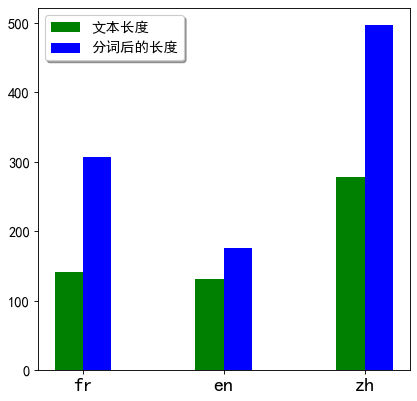

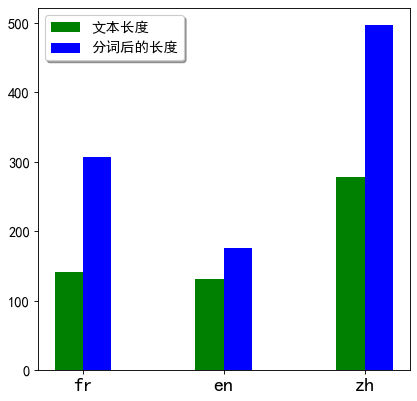

In [15]:
draw_bar(*get_token_stats(tokenizer_gpt2))

In [16]:
from datasets import load_dataset

data = load_dataset('BelleGroup/train_0.5M_CN')

In [19]:
data['train'][1]

{'instruction': '给定一个文字输入，将其中的所有数字加1。\n“明天的会议在9点开始，记得准时到达。”\n',
 'input': '',
 'output': '“明天的会议在10点开始，记得准时到达。”'}

In [20]:
def get_training_corpus():
    d = data['train'].select(range(10000))
    batch_size = 1000
    for i in range(0, len(d), batch_size):
        samples = d[i: i + batch_size]
        yield samples.get('instruction', [])

In [21]:
tokenizer_zh = tokenizer_gpt2.train_new_from_iterator(get_training_corpus(), 800)

In [22]:
'_'.join([tokenizer_zh.decode(i) for i in tokenizer_zh.encode(text_zh)])

'�_�_�_�_�_里_�_�_特_�_�_�_�_�_�_�_�_�_（_法_语_：_�_�_v_a_r_is_t_e_ _G_a_l_o_is_，_1_8_1_1_年_1_0_�_�_2_5_日_�_�_1_8_3_2_年_5_�_�_3_1_日_，_法_语_发_�_�_�_：_ _[_e_v_a_�_�_is_t_ _�_�_a_l_w_a_]_）_是_一_位_法_国_数_学_家_和_�_�_�_�_活_动_家_。_�_�_�_�_还_在_�_�_�_�_�_�_�_时_，_他_�_�_能_�_�_确_定_多_项_式_能_�_�_通_过_根_式_求_解_的_�_�_分_�_�_要_�_�_件_，_从_而_解_�_�_了_一个_�_�_而_�_�_�_�_的_问题_，_该_问题_�_�_经_�_�_在_了_3_5_0_年_。_他_的_工作_�_�_定_了_G_a_l_o_is_理_论_和_�_�_论_的_�_�_�_�_，_这_两个_是_�_�_�_�_�_�_�_数_的_重_要_分_�_�_。_他_是_一_位_�_�_定_的_�_�_和_�_�_，_�_�_�_度_�_�_与_了_1_8_3_0_年_法_国_大_�_�_�_�_期_间_的_�_�_�_�_动_�_�_�_。_�_�_于_他_的_�_�_�_�_活_动_，_他_多_�_�_�_�_�_�_�_�_�_，_其_中_一_�_�_入_�_�_数_�_�_。_�_�_于_�_�_因_不_明_，_他_在_�_�_�_�_�_�_�_�_�_后_不_�_�_，_�_�_与_了_一_场_�_�_�_�_并_因_�_�_�_�_而_去_�_�_。'

In [23]:
'_'.join([tokenizer_zh.decode(i) for i in tokenizer_zh.encode(text_en)])

'�_�_v_a_r_is_t_e_ _G_a_l_o_is_ _(_/_�_�_�_�_l_�_�_w_�_�_�_�_/_;_ _F_re_n_c_h_:_ _[_e_v_a_�_�_is_t_ _�_�_a_l_w_a_]_;_ _2_5_ _O_c_t_o_b_er_ 1_8_1_1_ _�_�_ _3_1_ _M_a_y_ 1_8_3_2_)_ w_a_s_ a_ _F_re_n_c_h_ _m_at_he_m_at_ic_i_an_ a_n_d_ _p_o_l_i_t_ic_a_l_ a_c_t_i_v_is_t_._ _W_h_i_le_ s_t_i_l_l_ _in_ _h_is_ t_e_en_s_,_ _he_ w_a_s_ a_b_le_ t_o_ _d_e_t_er_m_in_e_ a_ _n_e_c_e_s_s_a_r_y_ a_n_d_ s_u_f_f_ic_i_en_t_ _c_on_d_i_t_i_on_ f_or_ a_ _p_o_l_y_n_om_i_a_l_ t_o_ b_e_ s_o_l_v_a_b_le_ b_y_ _r_a_d_ic_a_l_s_,_ the_re_b_y_ s_o_l_v_ing_ a_ _p_r_o_b_le_m_ t_h_at_ _h_a_d_ b_e_en_ _o_p_en_ f_or_ _3_5_0_ _y_e_a_r_s_._ _H_is_ w_or_k_ _l_a_i_d_ the_ f_o_u_n_d_at_i_on_s_ f_or_ _G_a_l_o_is_ the_or_y_ a_n_d_ _g_r_o_u_p_ the_or_y_,_ t_w_o_ _m_a_j_or_ b_r_an_c_he_s_ _o_f_ a_b_s_t_r_a_c_t_ a_l_g_e_b_r_a_._ _H_e_ w_a_s_ a_ s_t_a_u_n_c_h_ _re_p_u_b_l_ic_an_ a_n_d_ w_a_s_ _he_a_v_i_l_y_ _in_v_o_l_v_e_d_ _in_ the_ _p_o_l_i_t_ic_a_l_ t_u_r_m_o_i_l_ t_h_at_ s_u_r_r_o_u_n_d_e_d_ the_ _F_re_n_c_h_ _R_e_v_o_l_u_t_i_on_

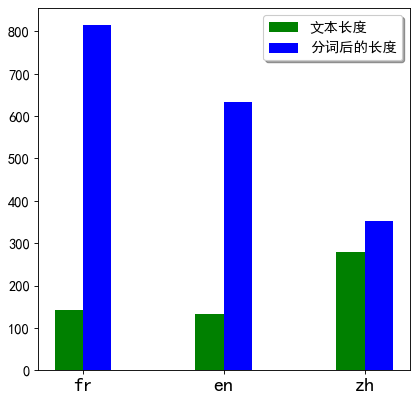

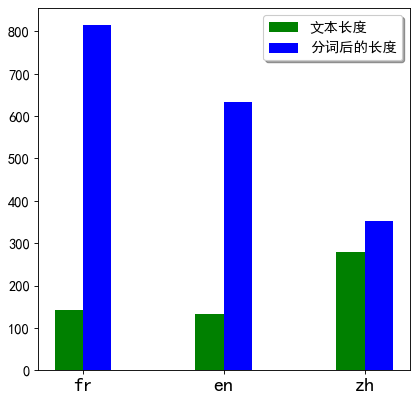

In [24]:
draw_bar(*get_token_stats(tokenizer_zh))